<a href="https://colab.research.google.com/github/jibrankhurram24/Fraud_Detection_Model/blob/main/Fraud_Detection_Model_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFD700; text-align: center; line-height: 0.55;background-color: #3B3B3C"><b>Credit Card Fraud Detection</b><br></h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Dataset Information</div></center>

### <center>Dataset Attributes</center>
    
- **V1 - V28** : Numerical features that are a result of PCA transformation.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

### Import the Necessary Libraries :

In [ ]:
# Load essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set float format for better readability
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/ml/creditcard.csv'  # Update this path if needed
df = pd.read_csv(file_path)

In [ ]:
# Display the first few records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### Data Info :

In [ ]:
# Display dataset dimensions
print("Dataset Shape:", df.shape)

Dataset Shape: (284807, 31)


In [ ]:
# List column names
print(df.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
# Overview of data types and null values
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [ ]:
# Quick summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


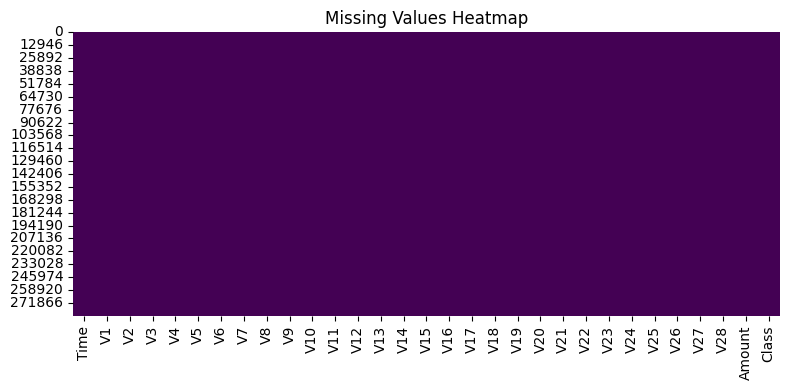

In [ ]:
# Visualize missing values (if any)
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### Target Variable Visualization (Class) :

<ipython-input-75-8c0f4d582cda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, palette=colors)
<ipython-input-75-8c0f4d582cda>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud'])


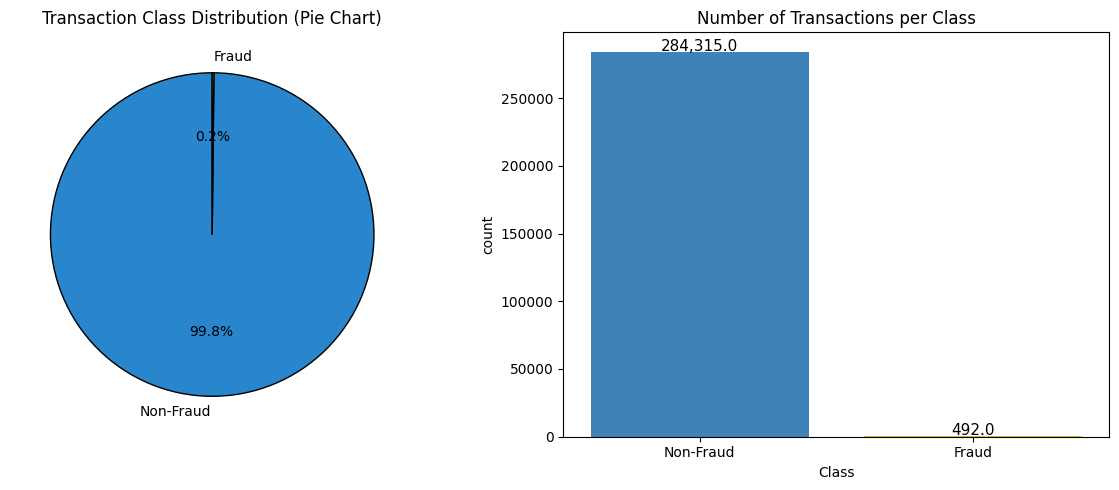

In [ ]:
# Calculate fraud vs. non-fraud percentages
fraud_percent = round(df['Class'].value_counts(normalize=True)[1] * 100, 2)
nonfraud_percent = round(df['Class'].value_counts(normalize=True)[0] * 100, 2)

# Prepare values for pie chart
labels = ['Non-Fraud', 'Fraud']
sizes = [nonfraud_percent, fraud_percent]
colors = ['#2986CC', '#FFD700']

# Plot pie chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Transaction Class Distribution (Pie Chart)")

# Plot count bar chart
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Class', data=df, palette=colors)
ax.set_xticklabels(['Non-Fraud', 'Fraud'])
plt.title("Number of Transactions per Class")

# Add value labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
            f'{bar.get_height():,}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()


# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Feature Selection</div></center>

### Correlation Matrix :

<Axes: >

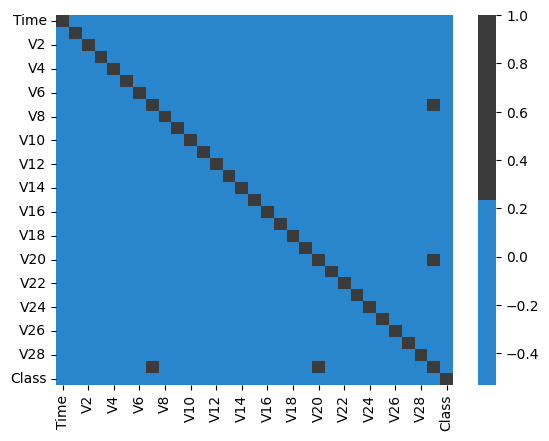

In [ ]:
sns.heatmap(df.corr(),cmap = colors,cbar = True)

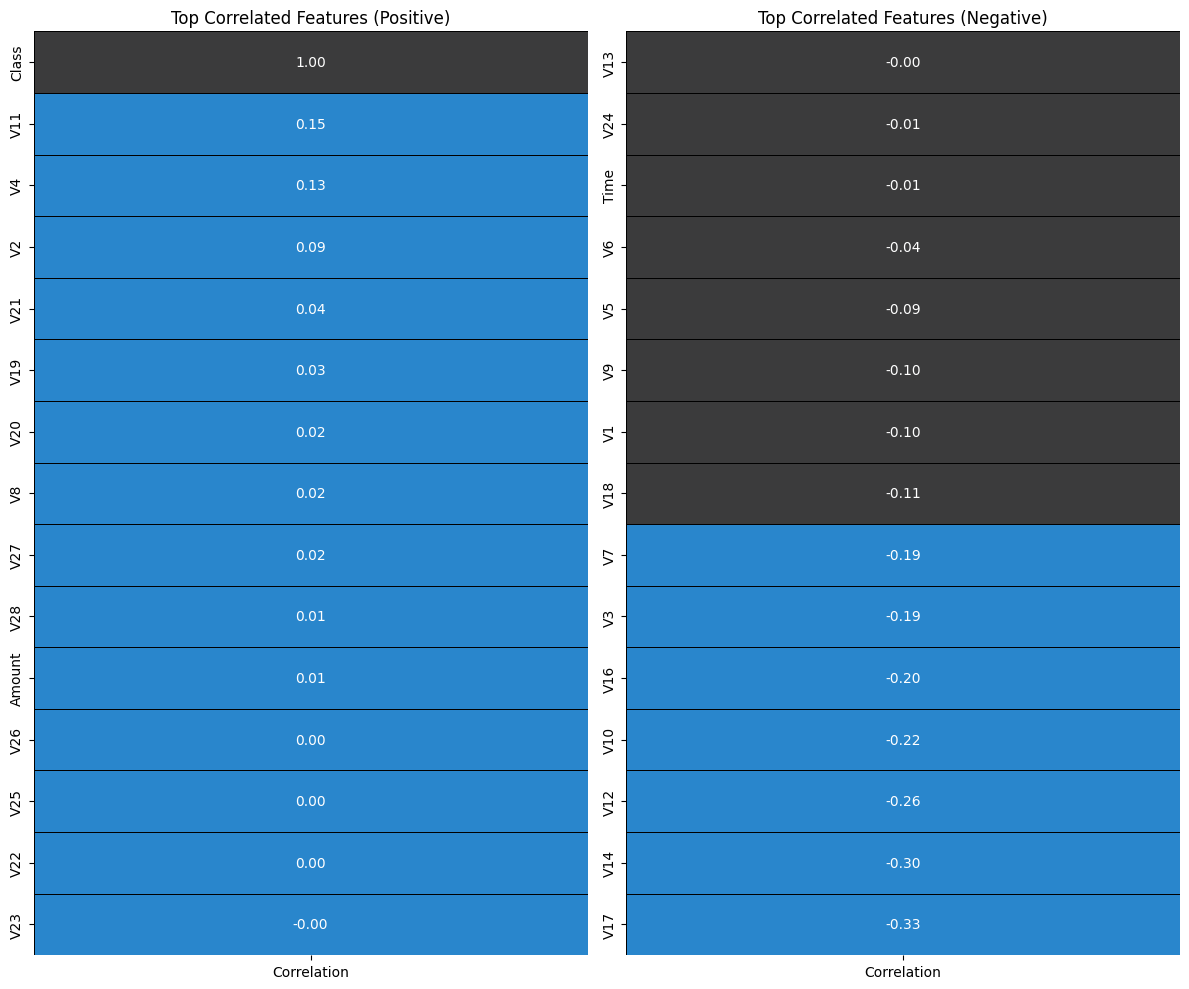

In [ ]:
# Compute correlation of each feature with the target class
correlation_matrix = df.corr()
target_corr = correlation_matrix['Class'].sort_values(ascending=False).to_frame().rename(columns={'Class': 'Correlation'})

# Visualize top and bottom correlated features with the target
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
colors = ['#2986CC', '#3B3B3C']

# Top 15 positively correlated features
sns.heatmap(target_corr.iloc[:15], annot=True, cmap=colors, cbar=False, linewidths=0.4, linecolor='black', fmt='.2f', ax=axes[0])
axes[0].set_title("Top Correlated Features (Positive)")

# Bottom 15 negatively correlated features
sns.heatmap(target_corr.iloc[-15:], annot=True, cmap=colors, cbar=False, linewidths=0.4, linecolor='black', fmt='.2f', ax=axes[1])
axes[1].set_title("Top Correlated Features (Negative)")

plt.tight_layout()
plt.show()


#### Dataset for Model based on Correlation Plot :

In [ ]:
# Calculate correlation of all features with the target
target_corr = df.corr()['Class'].to_frame().rename(columns={'Class': 'Correlation'})

# Identify weakly correlated features (between -0.1 and 0.1)
weak_corr_features = target_corr[
    (target_corr['Correlation'] > -0.1) &
    (target_corr['Correlation'] < 0.1)
].index.tolist()

# Ensure the target itself isn't removed
if 'Class' in weak_corr_features:
    weak_corr_features.remove('Class')

# Drop weak features and keep strong ones
df_filtered = df.drop(columns=weak_corr_features)

# Preview the new filtered dataset
df_filtered.head()


,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.36,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0
1,1.19,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,0
2,-1.36,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,0
3,-0.97,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,1.97,0
4,-1.16,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,-0.04,0


# Data Balancing

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Data Balancing for Model based on Correlation Plot :

In [ ]:
# Split into input features and target
X = df_filtered.drop('Class', axis=1).values
y = df_filtered['Class'].values

# Define sampling strategy
# First: Reduce majority class to 10%
# Then: SMOTE minority class up to 50% of majority
under = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
over = SMOTE(sampling_strategy=0.5, random_state=42)

# Combine steps in a pipeline
balance_pipeline = Pipeline(steps=[
    ('undersample', under),
    ('oversample', over)
])

# Apply resampling
X_resampled, y_resampled = balance_pipeline.fit_resample(X, y)

# Show class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled))

Class distribution after balancing: Counter({np.int64(0): 4920, np.int64(1): 2460})


# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Modeling</div></center>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Split the resampled dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=2,
    stratify=y_resampled  # Preserve class balance in both splits
)

In [ ]:
# Confirm the shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape:  {X_test.shape}, {y_test.shape}")

Training set shape: (5904, 11), (5904,)
Testing set shape:  (1476, 11), (1476,)


In [ ]:
# Function to train and evaluate model performance using ROC AUC & CV score
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    mean_cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc').mean()

    # ROC AUC score
    roc_score = roc_auc_score(y_test, y_pred)

    print(f"Cross-Validation ROC AUC Score: {mean_cv_score:.4f}")
    print(f"Test ROC AUC Score: {roc_score:.4f}")

    # Plot ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.show()

In [ ]:
# Function to print classification report and show confusion matrix
def evaluate_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [f"{value:,}" for value in cm.flatten()]
    percentages = [f"{value:.2%}" for value in cm.flatten() / cm.sum()]

    box_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(labels, counts, percentages)]
    box_labels = np.asarray(box_labels).reshape(2, 2)

    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=2))

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize model
lr_model = LogisticRegression(random_state=0, C=10, penalty='l2', solver='liblinear')

Cross-Validation ROC AUC Score: 0.9829
Test ROC AUC Score: 0.9411


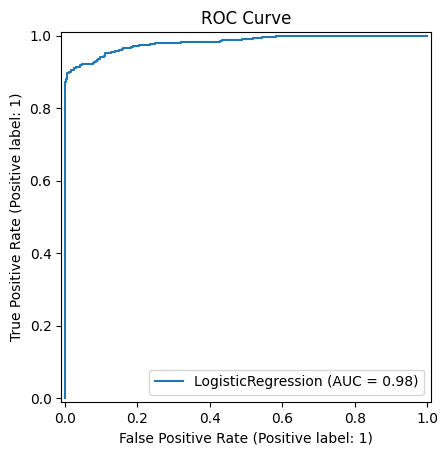

In [ ]:
# Train
train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)

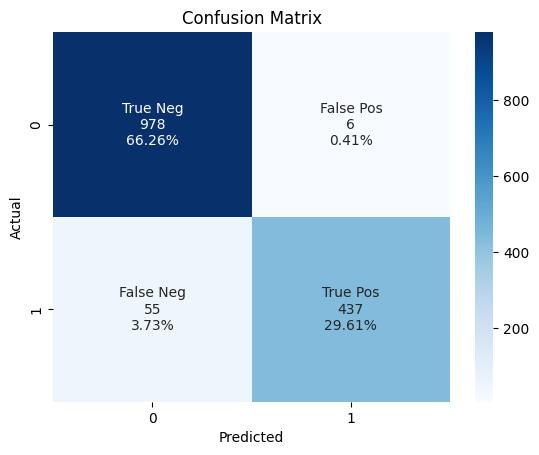


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       984
           1       0.99      0.89      0.93       492

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



In [ ]:
# Evaluate
evaluate_model_metrics(lr_model, X_test, y_test)

### 2. Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize model
svm_model = SVC(kernel='linear', C=0.1, probability=True)

Cross-Validation ROC AUC Score: 0.9798
Test ROC AUC Score: 0.9411


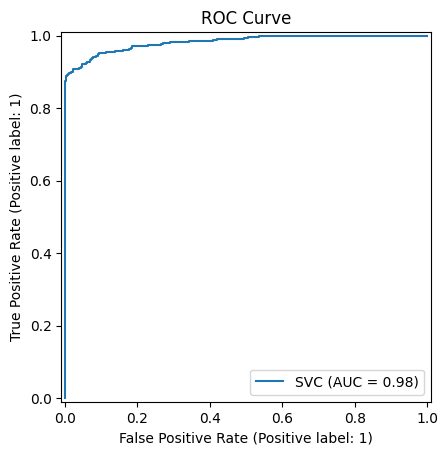

In [ ]:
# Train
train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test)

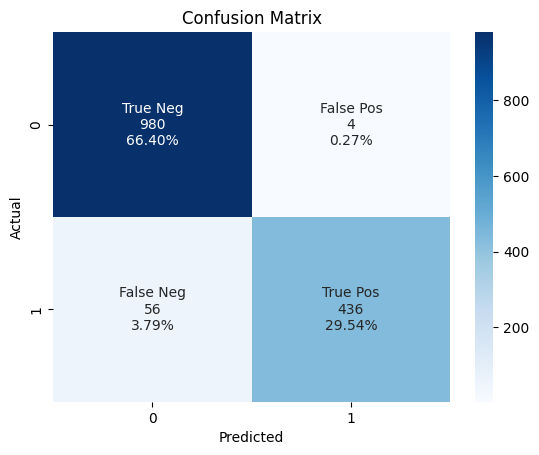


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       984
           1       0.99      0.89      0.94       492

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



In [ ]:
# Evaluate
evaluate_model_metrics(svm_model, X_test, y_test)

### 3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize model
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=1000)

Cross-Validation ROC AUC Score: 0.9680
Test ROC AUC Score: 0.9436


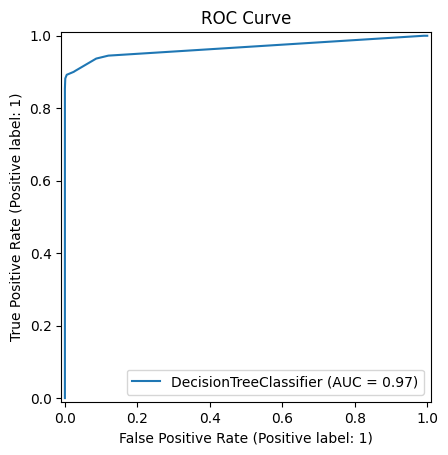

In [ ]:
# Train
train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test)

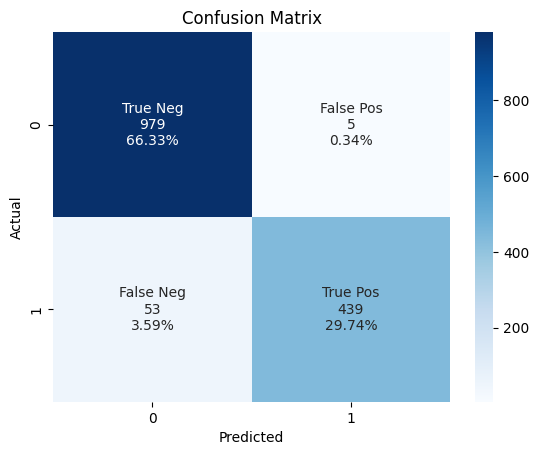


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       984
           1       0.99      0.89      0.94       492

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



In [ ]:
# Evaluate
evaluate_model_metrics(dt_model, X_test, y_test)

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize model
rf_model = RandomForestClassifier(max_depth=4, random_state=0)

Cross-Validation ROC AUC Score: 0.9824
Test ROC AUC Score: 0.9421


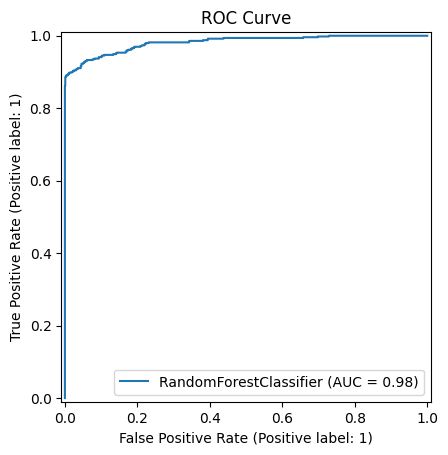

In [ ]:
# Train
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

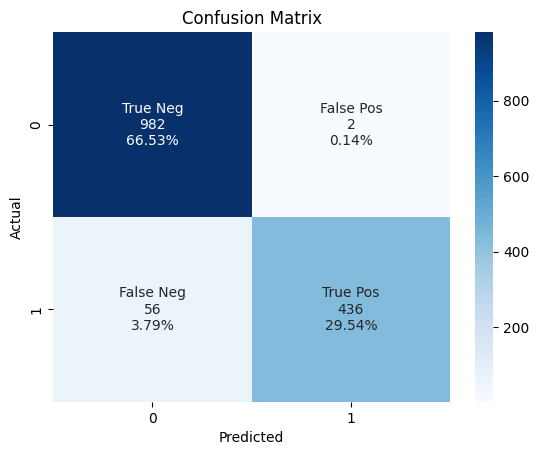


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       984
           1       1.00      0.89      0.94       492

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



In [ ]:
# Evaluate
evaluate_model_metrics(rf_model, X_test, y_test)

### 5. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize model
knn_model = KNeighborsClassifier(n_neighbors=3, leaf_size=1, p=1)

Cross-Validation ROC AUC Score: 0.9932
Test ROC AUC Score: 0.9883


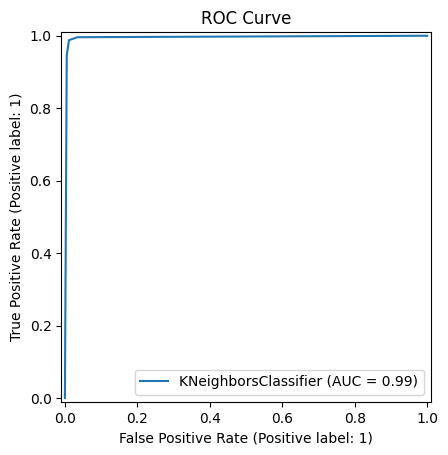

In [ ]:
# Train
train_and_evaluate_model(knn_model, X_train, y_train, X_test, y_test)

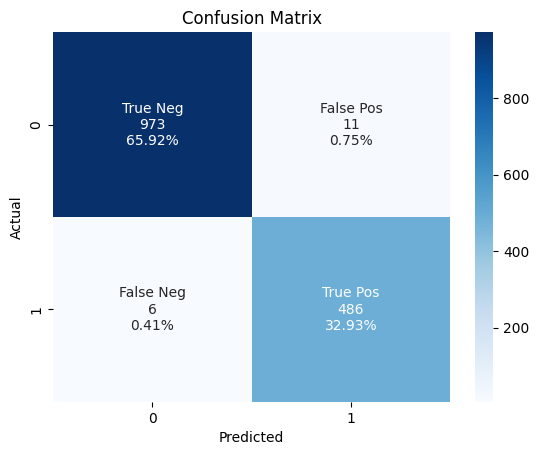


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.98      0.99      0.98       492

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476



In [ ]:
# Evaluate
evaluate_model_metrics(knn_model, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [ ]:
# Helper function to get scores from a trained model
def get_model_scores(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    return {
        'Model': model_name,
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'F1 Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    }

# Collect scores for each trained model
results = []

results.append(get_model_scores(lr_model, X_test, y_test, "Logistic Regression"))
results.append(get_model_scores(svm_model, X_test, y_test, "Support Vector Machine"))
results.append(get_model_scores(dt_model, X_test, y_test, "Decision Tree"))
results.append(get_model_scores(rf_model, X_test, y_test, "Random Forest"))
results.append(get_model_scores(knn_model, X_test, y_test, "K-Nearest Neighbors"))

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC AUC', ascending=False)
display(results_df)

,Model,ROC AUC,F1 Score,Precision,Recall,Accuracy
4,K-Nearest Neighbors,0.99,0.98,0.98,0.99,0.99
1,Support Vector Machine,0.98,0.94,0.99,0.89,0.96
3,Random Forest,0.98,0.94,1.00,0.89,0.96
0,Logistic Regression,0.98,0.93,0.99,0.89,0.96
2,Decision Tree,0.97,0.94,0.99,0.89,0.96
